## Уменьшение размерности с использованием метода t-SNE (t-distributed stochastic neighbor embedding) на MNIST-датасете

Импорт библиотек.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных и вывод первых пяти строк.

In [2]:
train = pd.read_csv('input/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Размерность массива.

In [3]:
train.shape

(42000, 785)

In [4]:
train.isnull().any().sum()

0

Количество тех или иных меток.

In [5]:
label = train["label"]
label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Удаление меток.

In [6]:
train = train.drop(labels = ["label"], axis = 1)

Использование PCA с двумя компонентами.

In [7]:
%%time
train = StandardScaler().fit_transform(train)

CPU times: user 2.41 s, sys: 355 ms, total: 2.76 s
Wall time: 2.81 s


In [8]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)

In [9]:
pca_res.shape

(42000, 2)

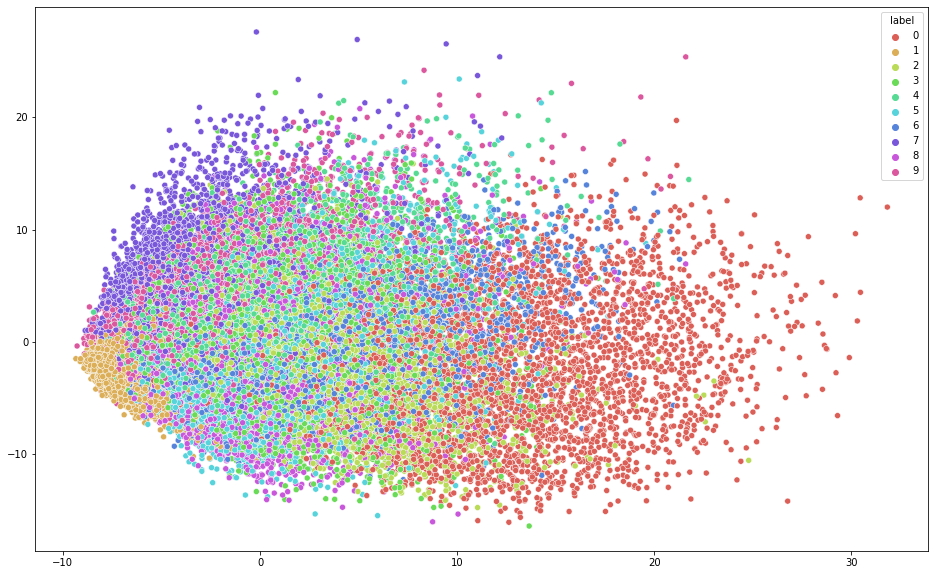

In [10]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');

Использование t-SNE с двумя компонентами.

In [11]:
%%time
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(train)

CPU times: user 30min 46s, sys: 1min 12s, total: 31min 59s
Wall time: 14min 12s


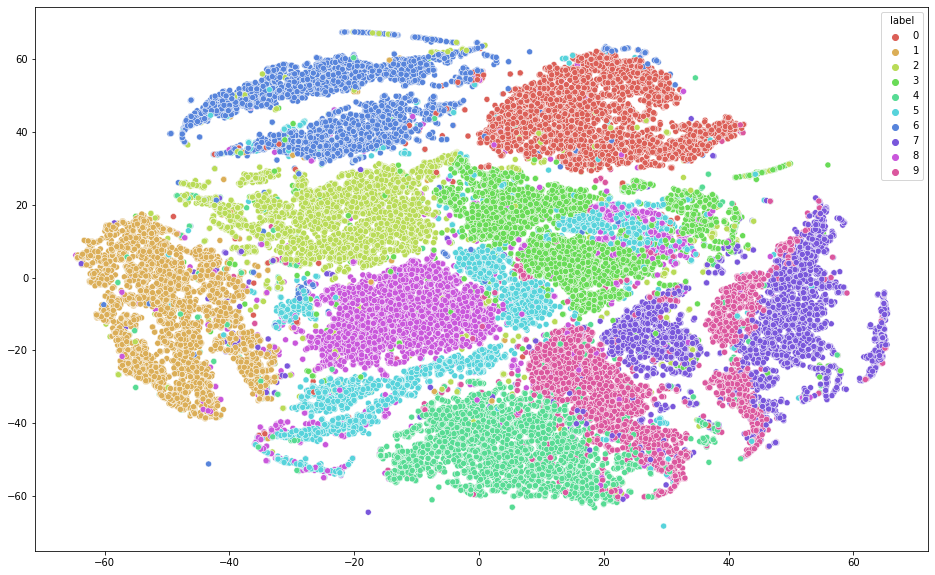

In [12]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');

Использование t-SNE в комбинации с PCA.

In [13]:
pca = PCA(n_components=50)
pca_res_50 = pca.fit_transform(train)

In [14]:
%%time
tsne_res = tsne.fit_transform(pca_res_50)

CPU times: user 25min 10s, sys: 38.9 s, total: 25min 49s
Wall time: 11min 44s


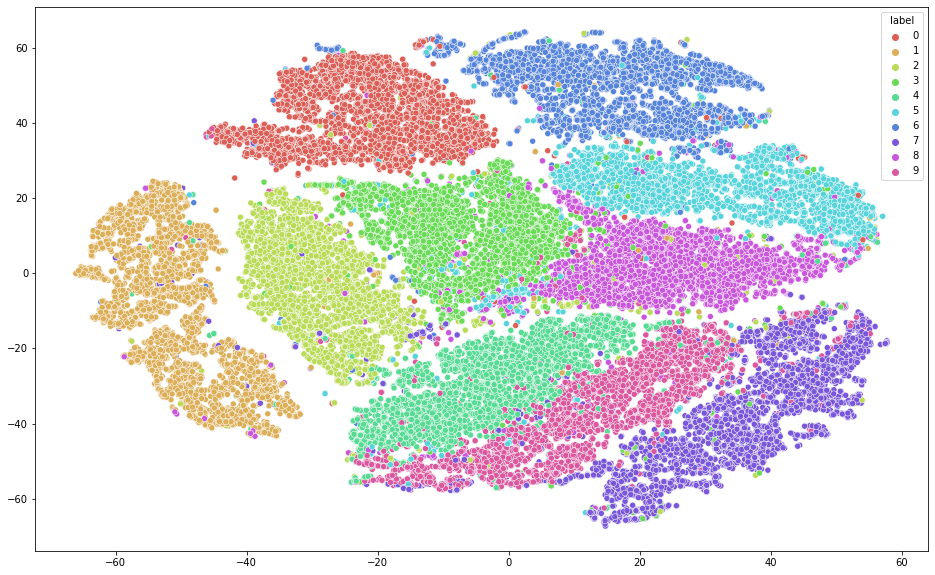

In [15]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');